In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

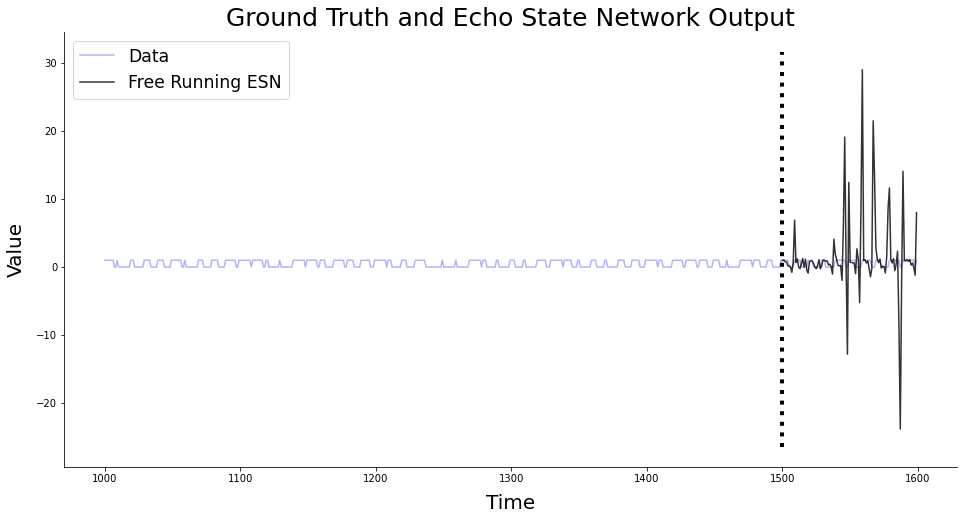

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import pyESN as pyESN
from pyESN import ESN 
from matplotlib import rc
warnings.filterwarnings('ignore')
%matplotlib inline


# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
# Read dataset 
data = open("y_data.csv").read().split()
data = np.array(data).astype('float64')

n_reservoir= 500 #number of neurons in reservoir
sparsity=0.2
rand_seed=23
spectral_radius = 1.3
noise = .0001


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = 1500
future = 10
futureTotal=100
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]


#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

plt.figure(figsize=(16,8))
plt.plot(range(1000,trainlen+futureTotal),data[1000:trainlen+futureTotal],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time', fontsize=20,labelpad=10)
plt.ylabel(r'Value', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

rho =  0.5 , noise =  0.0001 , MSE =  0.06776633931041233
rho =  0.5 , noise =  0.0003 , MSE =  0.06722812973190194
rho =  0.5 , noise =  0.0007 , MSE =  0.06802562767043589
rho =  0.5 , noise =  0.001 , MSE =  0.06860827966238621
rho =  0.5 , noise =  0.003 , MSE =  0.07000433179616165
rho =  0.5 , noise =  0.005 , MSE =  0.07026145433330125
rho =  0.5 , noise =  0.007 , MSE =  0.07029964038306812
rho =  0.5 , noise =  0.01 , MSE =  0.07025160047956497
rho =  0.7 , noise =  0.0001 , MSE =  0.0698770727002016
rho =  0.7 , noise =  0.0003 , MSE =  0.07020508988996424
rho =  0.7 , noise =  0.0007 , MSE =  0.06941858907140157
rho =  0.7 , noise =  0.001 , MSE =  0.0689440540680814
rho =  0.7 , noise =  0.003 , MSE =  0.06875955263282209
rho =  0.7 , noise =  0.005 , MSE =  0.06939712982404563
rho =  0.7 , noise =  0.007 , MSE =  0.0698714354479972
rho =  0.7 , noise =  0.01 , MSE =  0.07027889513781775
rho =  0.9 , noise =  0.0001 , MSE =  0.06519995283531535
rho =  0.9 , noise =  0.0003 

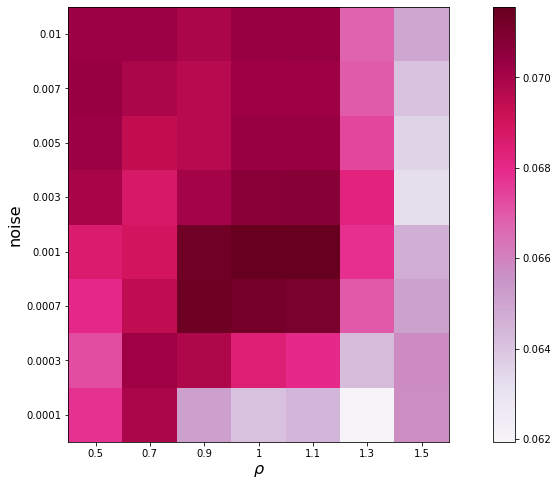

In [3]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))


n_reservoir= 500
sparsity   = 0.2
rand_seed  = 23
radius_set = [0.9, 1, 1.1]
noise_set = [0.001, 0.004, 0.006]

radius_set = [0.5, 0.7, 0.9, 1, 1.1, 1.3, 1.5]
noise_set = [0.0001, 0.0003,0.0007, 0.001, 0.003, 0.005, 0.007, 0.01]

radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)

trainlen = 1500
future = 2
futureTotal= 100

loss = np.zeros([radius_set_size, noise_set_size])

for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]

        pred_tot=np.zeros(futureTotal)

        esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = rho,
          noise=noise)

        for i in range(0,futureTotal,future):
            pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
            prediction = esn.predict(np.ones(future))
            pred_tot[i:i+future] = prediction[:,0]
        
        loss[l, j] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
        print('rho = ', radius_set[l], ', noise = ', noise_set[j], ', MSE = ', loss[l][j] )

plt.figure(figsize=(16,8))
im = plt.imshow(loss.T, vmin=abs(loss).min(), vmax=abs(loss).max(), origin='lower',cmap='PuRd')
plt.xticks(np.linspace(0,radius_set_size-1,radius_set_size), radius_set);
plt.yticks(np.linspace(0,noise_set_size-1, noise_set_size), noise_set);
plt.xlabel(r'$\rho$', fontsize=16); plt.ylabel('noise', fontsize=16); 

# im.set_interpolation('bilinear')
cb = plt.colorbar(im);

In [5]:
minLoss = np.min(loss)
index_min = np.where(loss == minLoss)
index_min
rho_opt = radius_set[int(index_min[0])]
noise_opt = noise_set[int(index_min[1])]
print('The optimal set is:\nspectrum radius = ',
      rho_opt,'\nnoise = ',noise_opt,'\nMSE = ',minLoss)

The optimal set is:
spectrum radius =  1.3 
noise =  0.0001 
MSE =  0.06193456544634509


In [7]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.3
noise = .0001

# let k_set be an array with the prediction-window values
k_set = [1,2,5,10]

k_size = len(k_set)
loss_k = np.zeros(k_size)

for l in range(k_size):
    future = k_set[l]

    trainlen = 1500    
    futureTotal=100
    
    pred_tot=np.zeros(futureTotal)

    esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = spectral_radius,
          noise=noise)


    for i in range(0,futureTotal,future):
        pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
        prediction = esn.predict(np.ones(future))
        pred_tot[i:i+future] = prediction[:,0]
        
    loss_k[l] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])

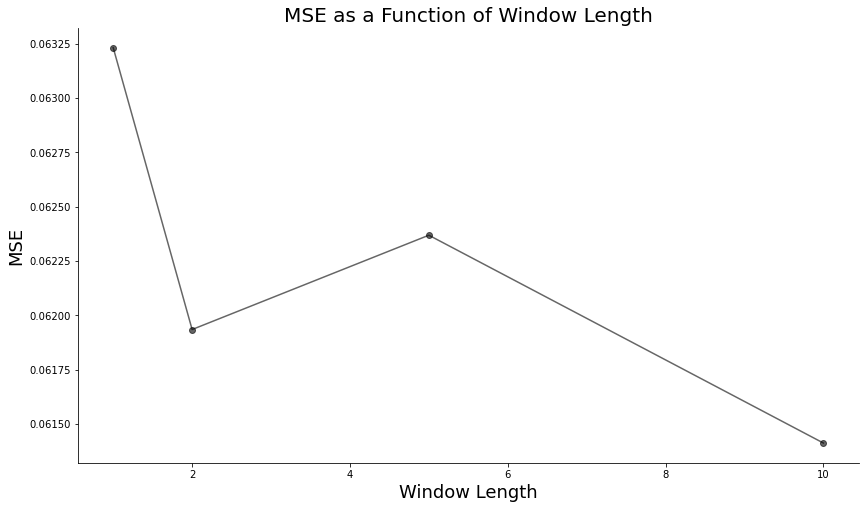

In [8]:
plt.figure(figsize=(14,8))
plt.plot(k_set, loss_k,'-ok', alpha=0.6)
plt.title('MSE as a Function of Window Length', fontsize=20)
plt.xlabel('Window Length', fontsize=18)
plt.ylabel('MSE', fontsize=18)
sns.despine()